# Lab 05-a: POS Tagging with NLTK and spaCy

- **NLTK**: Taggers: PerceptronTagger, Brill Tagger, etc.
- **spaCy**: Industrial-strength NLP framework

## 1. Setup và Installation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import time

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('brown')
nltk.download('universal_tagset')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk import pos_tag, word_tokenize
from nltk.corpus import brown
from nltk.tag import PerceptronTagger, UnigramTagger, BigramTagger, TrigramTagger



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!

In [2]:
!pip install spacy

In [3]:
import spacy

In [4]:
!python -m spacy download en_core_web_sm # for small model
# Run: python -m spacy download en_core_web_md # for medium model

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 2. NLTK POS Taggers

### 2.1. Default POS Tagger (Perceptron-based)

In [6]:
nltk.download('punkt_tab') # Add this line to download the missing resource

# NLTK's default tagger (PerceptronTagger)
test_sentences = [
    "The quick brown fox jumps over the lazy dog",
    "I want to learn natural language processing",
    "Python is a popular programming language",
    "She sells seashells by the seashore",
    "The cat sat on the mat"
]

print("NLTK Default POS Tagger (Penn Treebank Tags)")

for sentence in test_sentences:
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)

    print(f"\n'{sentence}'")
    print("  Tags:", end=" ")
    for word, tag in pos_tags:
        print(f"{word}/{tag}", end=" ")
    print()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK Default POS Tagger (Penn Treebank Tags)

'The quick brown fox jumps over the lazy dog'
  Tags: The/DT quick/JJ brown/NN fox/NN jumps/VBZ over/IN the/DT lazy/JJ dog/NN 

'I want to learn natural language processing'
  Tags: I/PRP want/VBP to/TO learn/VB natural/JJ language/NN processing/NN 

'Python is a popular programming language'
  Tags: Python/NNP is/VBZ a/DT popular/JJ programming/NN language/NN 

'She sells seashells by the seashore'
  Tags: She/PRP sells/VBZ seashells/NNS by/IN the/DT seashore/NN 

'The cat sat on the mat'
  Tags: The/DT cat/NN sat/VBD on/IN the/DT mat/NN 


In [7]:
# Using Universal tagset (simplified)
print("NLTK POS Tagger (Universal Tagset)")

for sentence in test_sentences:
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens, tagset='universal')

    print(f"\n'{sentence}'")
    print("  Tags:", end=" ")
    for word, tag in pos_tags:
        print(f"{word}/{tag}", end=" ")
    print()

NLTK POS Tagger (Universal Tagset)

'The quick brown fox jumps over the lazy dog'
  Tags: The/DET quick/ADJ brown/NOUN fox/NOUN jumps/VERB over/ADP the/DET lazy/ADJ dog/NOUN 

'I want to learn natural language processing'
  Tags: I/PRON want/VERB to/PRT learn/VERB natural/ADJ language/NOUN processing/NOUN 

'Python is a popular programming language'
  Tags: Python/NOUN is/VERB a/DET popular/ADJ programming/NOUN language/NOUN 

'She sells seashells by the seashore'
  Tags: She/PRON sells/VERB seashells/NOUN by/ADP the/DET seashore/NOUN 

'The cat sat on the mat'
  Tags: The/DET cat/NOUN sat/VERB on/ADP the/DET mat/NOUN 


### 2.2. Penn Treebank vs Universal Tagset

**Penn Treebank**: 36 tags (very detail)
- NN, NNS, NNP, NNPS (noun variations)
- VB, VBD, VBG, VBN, VBP, VBZ (verb variations)

**Universal**: 12 tags (much more simplified)
- NOUN, VERB, ADJ, ADV, etc.

In [8]:
# Tag comparison
sample_text = "The cats are running quickly through the beautiful garden"
tokens = word_tokenize(sample_text)

penn_tags = pos_tag(tokens)
universal_tags = pos_tag(tokens, tagset='universal')

print("\nTagset Comparison:")
print(f"{'Word':<15} {'Penn Treebank':<15} {'Universal':<15}")
print("-" * 45)

for (w1, pt), (w2, ut) in zip(penn_tags, universal_tags):
    print(f"{w1:<15} {pt:<15} {ut:<15}")


Tagset Comparison:
Word            Penn Treebank   Universal      
---------------------------------------------
The             DT              DET            
cats            NNS             NOUN           
are             VBP             VERB           
running         VBG             VERB           
quickly         RB              ADV            
through         IN              ADP            
the             DT              DET            
beautiful       JJ              ADJ            
garden          NN              NOUN           


### 2.3. Training Custom NLTK Taggers

NLTK allows to train custom taggers

In [9]:
# Load Brown corpus for training
print("Loading Brown corpus...")
brown_tagged = brown.tagged_sents(tagset='universal')

# Split data
split_idx = int(len(brown_tagged) * 0.8)
train_sents = brown_tagged[:split_idx]
test_sents = brown_tagged[split_idx:split_idx + 1000]  # Use 1000 for testing

print(f"Training sentences: {len(train_sents):,}")
print(f"Test sentences: {len(test_sents):,}")

Loading Brown corpus...
Training sentences: 45,872
Test sentences: 1,000


In [10]:
# 1. Unigram Tagger
print("\n[1/3] Training Unigram Tagger...")
unigram_tagger = UnigramTagger(train_sents)
unigram_accuracy = unigram_tagger.accuracy(test_sents)
print(f"  Accuracy: {unigram_accuracy:.2%}")


[1/3] Training Unigram Tagger...
  Accuracy: 91.45%


In [11]:
# 2. Bigram Tagger with Unigram backoff
print("\n[2/3] Training Bigram Tagger (with Unigram backoff)...")
bigram_tagger = BigramTagger(train_sents, backoff=unigram_tagger)
bigram_accuracy = bigram_tagger.accuracy(test_sents)
print(f"  Accuracy: {bigram_accuracy:.2%}")


[2/3] Training Bigram Tagger (with Unigram backoff)...
  Accuracy: 92.40%


In [12]:
# 3. Trigram Tagger with backoff chain
print("\n[3/3] Training Trigram Tagger (with Bigram & Unigram backoff)...")
trigram_tagger = TrigramTagger(train_sents, backoff=bigram_tagger)
trigram_accuracy = trigram_tagger.accuracy(test_sents)
print(f"  Accuracy: {trigram_accuracy:.2%}")


[3/3] Training Trigram Tagger (with Bigram & Unigram backoff)...
  Accuracy: 92.08%


In [13]:
# Compare taggers on sample sentence
sample = "The quick brown fox jumps over the lazy dog".split()

print("Comparison on sample sentence:")
print(f"Sentence: {' '.join(sample)}")

print("Unigram:", unigram_tagger.tag(sample))
print("Bigram: ", bigram_tagger.tag(sample))
print("Trigram:", trigram_tagger.tag(sample))

Comparison on sample sentence:
Sentence: The quick brown fox jumps over the lazy dog
Unigram: [('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'NOUN'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN')]
Bigram:  [('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN')]
Trigram: [('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN')]


## 3. spaCy POS Tagging

spaCy is an industrial-strength NLP framework:
- Pre-trained models
- NER, dependency parsing, etc.

### 3.1. Load spaCy Models

In [14]:
# Load spaCy model
# Small model (11MB)
print("Loading spaCy model (en_core_web_sm)...")
try:
    nlp_sm = spacy.load("en_core_web_sm")
    print("  Small model loaded")
except:
    print("  Small model not found. Run: python -m spacy download en_core_web_sm")
    nlp_sm = None

# Medium model (40MB) - better accuracy
try:
    nlp_md = spacy.load("en_core_web_md")
    print("  Medium model loaded")
except:
    print("  Medium model not found. Run: python -m spacy download en_core_web_md")
    nlp_md = None

Loading spaCy model (en_core_web_sm)...
  Small model loaded
  Medium model not found. Run: python -m spacy download en_core_web_md


### 3.2. Basic POS Tagging with spaCy

In [15]:
if nlp_sm:
    print("spaCy POS Tagging")

    for sentence in test_sentences:
        doc = nlp_sm(sentence)

        print(f"\n'{sentence}'")
        print(f"  {'Word':<15} {'POS':<10} {'Tag':<10} {'Dep':<10}")

        for token in doc:
            print(f"  {token.text:<15} {token.pos_:<10} {token.tag_:<10} {token.dep_:<10}")

spaCy POS Tagging

'The quick brown fox jumps over the lazy dog'
  Word            POS        Tag        Dep       
  The             DET        DT         det       
  quick           ADJ        JJ         amod      
  brown           ADJ        JJ         amod      
  fox             NOUN       NN         nsubj     
  jumps           VERB       VBZ        ROOT      
  over            ADP        IN         prep      
  the             DET        DT         det       
  lazy            ADJ        JJ         amod      
  dog             NOUN       NN         pobj      

'I want to learn natural language processing'
  Word            POS        Tag        Dep       
  I               PRON       PRP        nsubj     
  want            VERB       VBP        ROOT      
  to              PART       TO         aux       
  learn           VERB       VB         xcomp     
  natural         ADJ        JJ         amod      
  language        NOUN       NN         compound  
  processing      NOU

### 3.3. spaCy Tag Explanations

In [16]:
if nlp_sm:
    # Explain tags
    sample_text = "The cats were running quickly through the beautiful garden"
    doc = nlp_sm(sample_text)

    print("\nDetailed Tag Information:")
    print(f"{'Word':<15} {'POS':<10} {'Tag':<10} {'Explanation':<30}")

    for token in doc:
        # Get explanation
        explanation = spacy.explain(token.tag_)
        print(f"{token.text:<15} {token.pos_:<10} {token.tag_:<10} {explanation if explanation else 'N/A':<30}")


Detailed Tag Information:
Word            POS        Tag        Explanation                   
The             DET        DT         determiner                    
cats            NOUN       NNS        noun, plural                  
were            AUX        VBD        verb, past tense              
running         VERB       VBG        verb, gerund or present participle
quickly         ADV        RB         adverb                        
through         ADP        IN         conjunction, subordinating or preposition
the             DET        DT         determiner                    
beautiful       ADJ        JJ         adjective (English), other noun-modifier (Chinese)
garden          NOUN       NN         noun, singular or mass        


### 3.4. Advanced spaCy Features

In [17]:
if nlp_sm:
    # Morphological features
    text = "He was running quickly, but she runs faster."
    doc = nlp_sm(text)

    print("\nMorphological Analysis:")
    print(f"{'Word':<15} {'Lemma':<15} {'POS':<10} {'Morph Features':<30}")

    for token in doc:
        print(f"{token.text:<15} {token.lemma_:<15} {token.pos_:<10} {str(token.morph):<30}")


Morphological Analysis:
Word            Lemma           POS        Morph Features                
He              he              PRON       Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs
was             be              AUX        Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
running         run             VERB       Aspect=Prog|Tense=Pres|VerbForm=Part
quickly         quickly         ADV                                      
,               ,               PUNCT      PunctType=Comm                
but             but             CCONJ      ConjType=Cmp                  
she             she             PRON       Case=Nom|Gender=Fem|Number=Sing|Person=3|PronType=Prs
runs            run             VERB       Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
faster          fast            ADV        Degree=Cmp                    
.               .               PUNCT      PunctType=Peri                


## 4. Comparison and Benchmarking

- Accuracy
- Speed
- Ease of use

### 4.1. Speed Comparison

In [18]:
# Prepare test data
test_texts = [
    "The quick brown fox jumps over the lazy dog.",
    "Natural language processing is fascinating.",
    "Machine learning models can understand human language.",
    "Python is a versatile programming language.",
    "Deep learning has revolutionized artificial intelligence."
] * 100  # 500 sentences

print(f"Testing on {len(test_texts)} sentences...\n")

results = {}

# NLTK Default
print("[1/3] Testing NLTK default tagger...")
start = time.time()
for text in test_texts:
    tokens = word_tokenize(text)
    _ = pos_tag(tokens)
nltk_time = time.time() - start
results['NLTK Default'] = nltk_time
print(f"  Time: {nltk_time:.3f}s ({len(test_texts)/nltk_time:.1f} sent/s)")

# spaCy Small
if nlp_sm:
    print("\n[2/3] Testing spaCy (small model)...")
    start = time.time()
    for text in test_texts:
        _ = nlp_sm(text)
    spacy_sm_time = time.time() - start
    results['spaCy Small'] = spacy_sm_time
    print(f"  Time: {spacy_sm_time:.3f}s ({len(test_texts)/spacy_sm_time:.1f} sent/s)")

# spaCy Medium
if nlp_md:
    print("\n[3/3] Testing spaCy (medium model)...")
    start = time.time()
    for text in test_texts:
        _ = nlp_md(text)
    spacy_md_time = time.time() - start
    results['spaCy Medium'] = spacy_md_time
    print(f"  Time: {spacy_md_time:.3f}s ({len(test_texts)/spacy_md_time:.1f} sent/s)")

Testing on 500 sentences...

[1/3] Testing NLTK default tagger...
  Time: 0.183s (2737.4 sent/s)

[2/3] Testing spaCy (small model)...
  Time: 3.439s (145.4 sent/s)


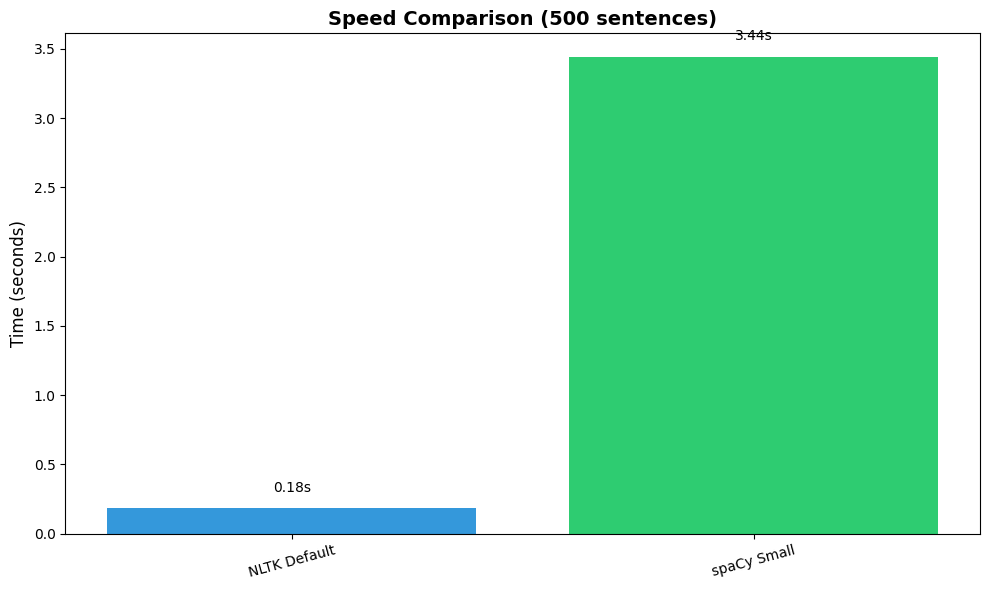

In [19]:
# Visualize speed comparison
if results:
    plt.figure(figsize=(10, 6))
    models = list(results.keys())
    times = list(results.values())

    plt.bar(models, times, color=['#3498db', '#2ecc71', '#f39c12'][:len(models)])
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.title(f'Speed Comparison ({len(test_texts)} sentences)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=15)

    # Add value labels
    for i, (model, time_val) in enumerate(zip(models, times)):
        plt.text(i, time_val + 0.1, f'{time_val:.2f}s', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

### 4.2. Side-by-Side Comparison

In [20]:
# Compare different taggers on the same sentences
comparison_sentences = [
    "The stock market crashed yesterday.",
    "She can run faster than anyone.",
    "I will book a flight to Paris.",
    "The book on the table is mine."
]

for sent in comparison_sentences:
    print(f"Sentence: {sent}")

    tokens = word_tokenize(sent)

    # NLTK
    nltk_tags = pos_tag(tokens, tagset='universal')
    print(f"\nNLTK:    ", end="")
    for word, tag in nltk_tags:
        print(f"{word}/{tag}", end=" ")

    # Unigram
    unigram_tags = unigram_tagger.tag(tokens)
    print(f"\nUnigram: ", end="")
    for word, tag in unigram_tags:
        tag = tag if tag else 'NOUN'
        print(f"{word}/{tag}", end=" ")

    # Trigram
    trigram_tags = trigram_tagger.tag(tokens)
    print(f"\nTrigram: ", end="")
    for word, tag in trigram_tags:
        tag = tag if tag else 'NOUN'
        print(f"{word}/{tag}", end=" ")

    # spaCy
    if nlp_sm:
        doc = nlp_sm(sent)
        print(f"\nspaCy:   ", end="")
        for token in doc:
            print(f"{token.text}/{token.pos_}", end=" ")

Sentence: The stock market crashed yesterday.

NLTK:    The/DET stock/NOUN market/NOUN crashed/VERB yesterday/NOUN ./. 
Unigram: The/DET stock/NOUN market/NOUN crashed/VERB yesterday/NOUN ./. 
Trigram: The/DET stock/NOUN market/NOUN crashed/VERB yesterday/NOUN ./. 
spaCy:   The/DET stock/NOUN market/NOUN crashed/VERB yesterday/NOUN ./PUNCT Sentence: She can run faster than anyone.

NLTK:    She/PRON can/VERB run/VERB faster/ADJ than/ADP anyone/NOUN ./. 
Unigram: She/PRON can/VERB run/VERB faster/ADV than/ADP anyone/NOUN ./. 
Trigram: She/PRON can/VERB run/VERB faster/ADV than/ADP anyone/NOUN ./. 
spaCy:   She/PRON can/AUX run/VERB faster/ADV than/ADP anyone/PRON ./PUNCT Sentence: I will book a flight to Paris.

NLTK:    I/PRON will/VERB book/NOUN a/DET flight/NOUN to/PRT Paris/NOUN ./. 
Unigram: I/PRON will/VERB book/NOUN a/DET flight/NOUN to/PRT Paris/NOUN ./. 
Trigram: I/PRON will/VERB book/NOUN a/DET flight/NOUN to/PRT Paris/NOUN ./. 
spaCy:   I/PRON will/AUX book/VERB a/DET flight/

## 5. Examples

### 5.1. Extract Noun Phrases

In [21]:
# Extract noun phrases using POS patterns
def extract_noun_phrases_nltk(text):
    """
    Extract noun phrases (ADJ* NOUN+) using NLTK.
    """
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens, tagset='universal')

    noun_phrases = []
    current_phrase = []

    for word, tag in pos_tags:
        if tag in ['ADJ', 'NOUN']:
            current_phrase.append(word)
        else:
            if current_phrase and any(w for w, t in pos_tags if t == 'NOUN' and w in current_phrase):
                noun_phrases.append(' '.join(current_phrase))
            current_phrase = []

    if current_phrase:
        noun_phrases.append(' '.join(current_phrase))

    return noun_phrases

sample_text = """
The quick brown fox jumps over the lazy dog.
Natural language processing is a fascinating field of artificial intelligence.
Modern machine learning algorithms can process large amounts of textual data.
"""

print("Extracting noun phrases with NLTK:")
nltk_phrases = extract_noun_phrases_nltk(sample_text)
for phrase in nltk_phrases:
    if len(phrase.split()) > 1:  # Only multi-word phrases
        print(f"  - {phrase}")

Extracting noun phrases with NLTK:
  - quick brown fox
  - lazy dog
  - Natural language processing
  - fascinating field
  - artificial intelligence
  - Modern machine
  - large amounts
  - textual data


In [22]:
# Extract noun phrases using spaCy
if nlp_sm:
    print("\nExtracting noun phrases with spaCy:")
    doc = nlp_sm(sample_text)

    for chunk in doc.noun_chunks:
        print(f"  - {chunk.text} (root: {chunk.root.text}, dep: {chunk.root.dep_})")


Extracting noun phrases with spaCy:
  - 
The quick brown fox (root: fox, dep: nsubj)
  - the lazy dog (root: dog, dep: pobj)
  - Natural language processing (root: processing, dep: nsubj)
  - a fascinating field (root: field, dep: attr)
  - artificial intelligence (root: intelligence, dep: pobj)
  - Modern machine learning algorithms (root: algorithms, dep: nsubj)
  - large amounts (root: amounts, dep: dobj)
  - textual data (root: data, dep: pobj)


### 5.2. Extract Verbs and Their Objects

In [23]:
if nlp_sm:
    # Extract verb-object pairs using dependency parsing
    text = """I love programming. She studies natural language processing.
    They built a sophisticated machine learning model."""

    doc = nlp_sm(text)

    print("Verb-Object pairs:")
    for token in doc:
        if token.pos_ == "VERB":
            # Find direct objects
            objects = [child for child in token.children if child.dep_ in ('dobj', 'obj')]
            for obj in objects:
                # Get the full noun phrase
                obj_phrase = " ".join([child.text for child in obj.subtree])
                print(f"  {token.text} → {obj_phrase}")

Verb-Object pairs:
  love → programming
  studies → natural language processing
  built → a sophisticated machine learning model


### 5.3. Text Simplification

In [24]:
# Remove adjectives and adverbs for text simplification
def simplify_text(text, use_spacy=True):
    """
    Remove adjectives and adverbs to simplify text.
    """
    if use_spacy and nlp_sm:
        doc = nlp_sm(text)
        simplified = " ".join([token.text for token in doc
                              if token.pos_ not in ['ADJ', 'ADV']])
    else:
        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens, tagset='universal')
        simplified = " ".join([word for word, tag in pos_tags
                              if tag not in ['ADJ', 'ADV']])

    return simplified

complex_text = "The extremely talented young programmer quickly developed a highly sophisticated algorithm."

print("Original text:")
print(f"  {complex_text}")
print("\nSimplified (NLTK):")
print(f"  {simplify_text(complex_text, use_spacy=False)}")

if nlp_sm:
    print("\nSimplified (spaCy):")
    print(f"  {simplify_text(complex_text, use_spacy=True)}")

Original text:
  The extremely talented young programmer quickly developed a highly sophisticated algorithm.

Simplified (NLTK):
  The programmer developed a algorithm .

Simplified (spaCy):
  The programmer developed a algorithm .


## 6. Summary

### When to Use:

**Use NLTK when:**
- Learning NLP concepts
- Need fine-grained control
- Want to implement custom algorithms
- Working with smaller datasets

**Use spaCy when:**
- Building production systems
- Need high performance
- Want additional features (NER, dependency parsing)
- Working with large-scale data